In [27]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 

In [9]:
df2020 = pd.read_csv("dados/INMET_CO_DF_A001_BRASILIA_01-01-2020_A_31-12-2020.CSV", decimal=',', thousands='.', sep=";", index_col='Data')
df2020.rename(columns={'TEMPERATURA MAXIMA NA HORA ANT. (AUT) (°C)': 'TEMP'}, inplace=True)
temp_max_2020 = df2020['TEMP'].copy()

df2021 = pd.read_csv("dados/INMET_CO_DF_A001_BRASILIA_01-01-2021_A_31-12-2021.CSV", decimal=',', thousands='.', sep=";", index_col='Data', encoding='latin1')
df2021.rename(columns={'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'TEMP'}, inplace=True)
temp_max_2021 = df2021['TEMP'].copy()

df2022 = pd.read_csv("dados/INMET_CO_DF_A001_BRASILIA_01-01-2022_A_31-12-2022.CSV", decimal=',', thousands='.', sep=";", index_col='Data', encoding='latin1')
df2022.rename(columns={'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'TEMP'}, inplace=True)
temp_max_2022 = df2022['TEMP'].copy()

df2023 = pd.read_csv("dados/INMET_CO_DF_A001_BRASILIA_01-01-2023_A_31-12-2023.CSV", decimal=',', thousands='.', sep=";", index_col='Data', encoding='latin1')
df2023.rename(columns={'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'TEMP'}, inplace=True)
temp_max_2023 = df2023['TEMP'].copy()

df2024 = pd.read_csv("dados/INMET_CO_DF_A001_BRASILIA_01-01-2024_A_31-05-2024.CSV", decimal=',', thousands='.', sep=";", index_col='Data', encoding='latin1')
df2024.rename(columns={'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'TEMP'}, inplace=True)
temp_max_2024 = df2024['TEMP'].copy()

temp_max_combined = pd.concat([temp_max_2020, temp_max_2021, temp_max_2022, temp_max_2023, temp_max_2024])


temp_max_combined.index = pd.to_datetime(temp_max_combined.index, format='%Y/%m/%d')

temp_max_combined.dropna(inplace=True)

In [10]:
temp_max_combined.describe()

count    38692.000000
mean        22.254058
std          4.052434
min          6.000000
25%         19.300000
50%         21.800000
75%         25.200000
max         36.500000
Name: TEMP, dtype: float64

In [11]:
df = temp_max_combined.copy()

In [16]:
df

Data
2020-01-01    20.2
2020-01-01    20.0
2020-01-01    20.1
2020-01-01    20.2
2020-01-01    19.8
              ... 
2024-05-31    25.6
2024-05-31    25.3
2024-05-31    23.9
2024-05-31    22.0
2024-05-31    21.1
Name: TEMP, Length: 38692, dtype: float64

In [14]:
df_monthly = df.resample('ME').mean()


In [15]:
df_monthly

Data
2020-01-31    22.852554
2020-02-29    22.414080
2020-03-31    22.206989
2020-04-30    21.868056
2020-05-31    19.898925
2020-06-30    19.928056
2020-07-31    20.088441
2020-08-31    21.198656
2020-09-30    24.385833
2020-10-31    24.414247
2020-11-30    22.249306
2020-12-31    23.173522
2021-01-31    23.045565
2021-02-28    21.483333
2021-03-31    22.406057
2021-04-30    21.410694
2021-05-31    20.727285
2021-06-30    20.118194
2021-07-31    19.335081
2021-08-31    21.704717
2021-09-30    25.769167
2021-10-31    23.877419
2021-11-30    21.859028
2021-12-31    21.785349
2022-01-31    22.121774
2022-02-28    21.919196
2022-03-31    22.924462
2022-04-30    23.079583
2022-05-31    20.418683
2022-06-30    20.386528
2022-07-31    20.193817
2022-08-31    22.020699
2022-09-30    23.739583
2022-10-31    24.455242
2022-11-30    21.353333
2022-12-31    21.388441
2023-01-31    21.704167
2023-02-28    23.475893
2023-03-31    22.246237
2023-04-30    21.696250
2023-05-31    20.837231
2023-06-30 

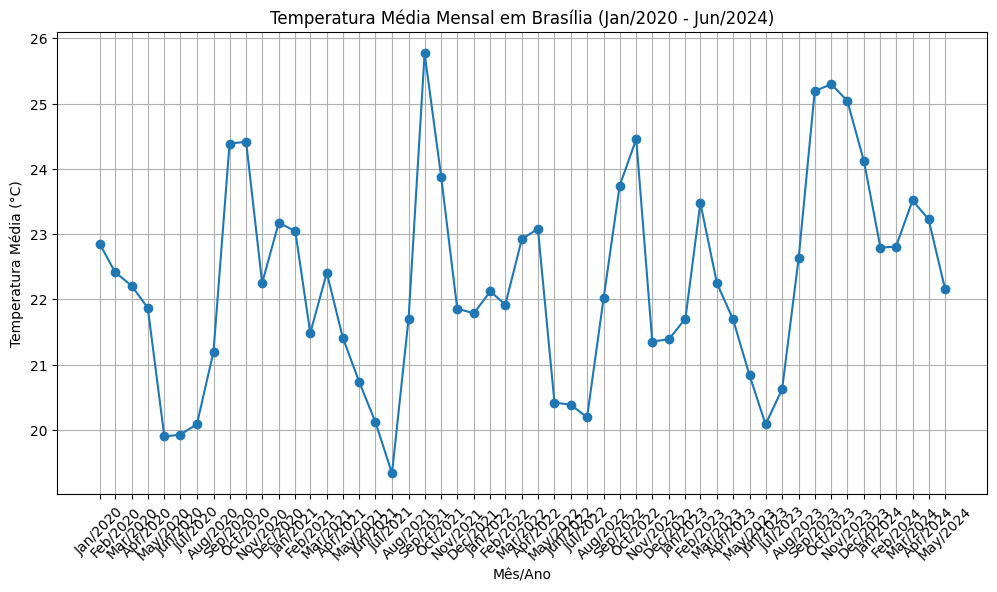

In [21]:
# Plotar as médias mensais
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly.values, marker='o', linestyle='-')
plt.title('Temperatura Média Mensal em Brasília (Jan/2020 - Jun/2024)')
plt.xlabel('Mês/Ano')
plt.ylabel('Temperatura Média (°C)')
plt.grid(True)

# Melhorar as marcações no eixo x
plt.xticks(df_monthly.index, df_monthly.index.strftime('%b/%Y'), rotation=45)

plt.show()

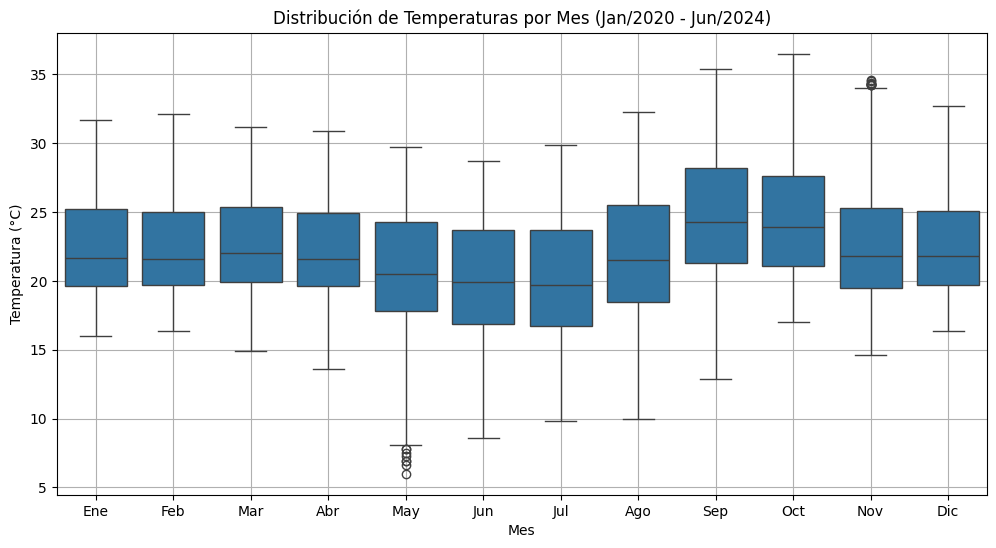

In [28]:

plt.figure(figsize=(12, 6))
sns.boxplot(x=df.index.month, y=df.values)
plt.title('Distribución de Temperaturas por Mes (Jan/2020 - Jun/2024)')
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.xticks(range(0, 12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True)
plt.show()

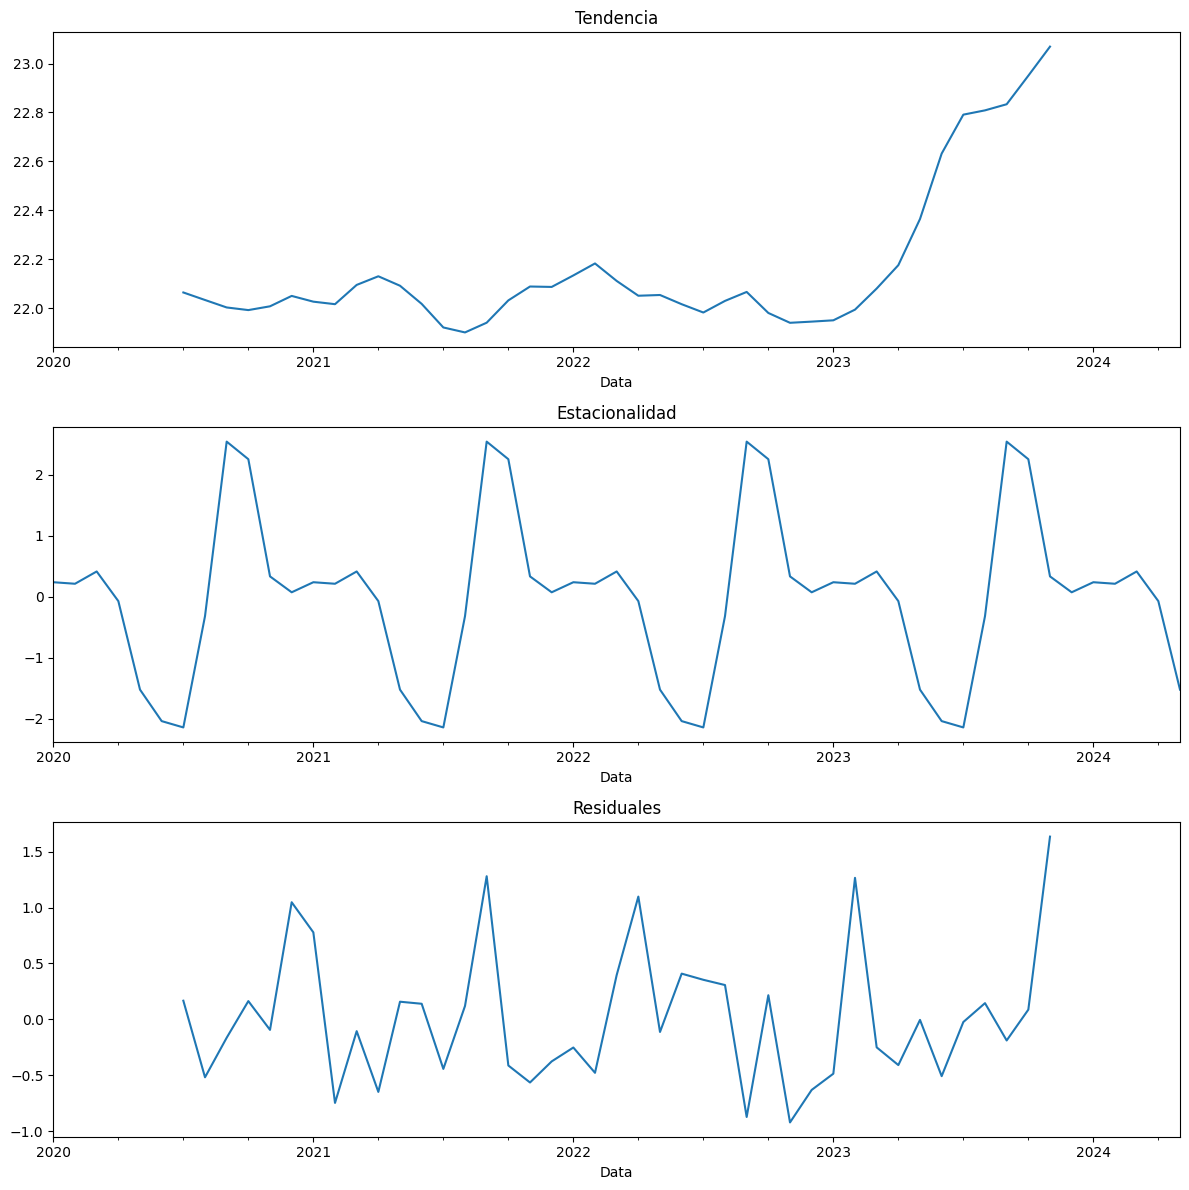

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición estacional
decomposition = seasonal_decompose(df.resample('ME').mean(), model='additive')

# Plotear componentes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
decomposition.trend.plot(ax=ax1, title='Tendencia')
decomposition.seasonal.plot(ax=ax2, title='Estacionalidad')
decomposition.resid.plot(ax=ax3, title='Residuales')
plt.tight_layout()
plt.show()